In [2]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import pymeshlab as mlab
from src.pytetgen import read_tetgen,call_tetgen
from get_mesh_stats import find_mesh_quality
import os
import time
dir = 'C:\\Users\\amcsween\\Desktop\\Ultraliser_comparison\\Selected_Cells\\meshes'
dir = 'C:\\Users\\amcsween\\Desktop\\Ultraliser_comparison\\Random_Cells\\meshes'
dir = 'C:\\Users\\amcsween\\Documents\\GitHub\\NeuronSet2\\Random_Cells\\surface_meshes2'
dir = 'C:\\Users\\amcsween\\Desktop\\AnaMorph_comparison\\Random_Cells\\meshes'
dir = 'C:\\Users\\amcsween\\Desktop\\Ultraliser_comparison\\Random_Cells_watertight\\meshes'

files = [file for file in os.listdir(dir) if file.endswith('-watertight.ply')]
log_file = f'{dir}/mesh_stats.db'

In [3]:
files

['1A-06-traced-control-21-watertight.ply',
 '21162rbkof_08-watertight.ply',
 '3792823-watertight.ply',
 '4-3_24-watertight.ply',
 '4s2-CA1-06-12-22-watertight.ply',
 '5A-2-traced-control-1-watertight.ply',
 'AD0602-PL-L-3401-fiber05-watertight.ply',
 'Adol_2M_NoLight-12-watertight.ply',
 'Anstoetz_Toolbox-IN4-watertight.ply',
 'asl-rhin-CB4-20_11_03-watertight.ply',
 'asl-rhin-CD2-20_0009-2_01-watertight.ply',
 'C12_1-6_80um_GFAP_Z-fixed0102_08-April16_C31-watertight.ply',
 'C2-Tipo-III-1-watertight.ply',
 'Casp6_C163A_Neuron_11-watertight.ply',
 'CCKBC_Calb_A141126-02-watertight.ply',
 'cell-185-trace-watertight.ply',
 'Cortex_1264-7-watertight.ply',
 'E3F-230_1_D-watertight.ply',
 'fru-F-700195-watertight.ply',
 'fru-F-700196-watertight.ply',
 'GFP_50_2-watertight.ply',
 'Gunnersen_A12b3slice1LHS-watertight.ply',
 'H1-11-watertight.ply',
 'H9-MECP2-T158M-T158M-Untreated-45-watertight.ply',
 'Hoxd10-none-righteyecontrol-04292013-40x-cell1-stitch-watertight.ply',
 'Hoxd10-none-righteye

In [4]:
mesh_quality=[]
tetgen_time =[]
mesh_size =[]
for file in files:
    start = time.time()
    file = os.path.join(dir,file)
    tet_file = file.replace('.ply','.1')
    # if not(os.path.isfile(tet_file+'.node')):
    call_tetgen(file,"-pq1.2a1.0O9/7VC")
    tetgen_time.append(time.time() - start)
    if os.path.isfile(tet_file+'.ele'):
        q = find_mesh_quality(tet_file)
        nodes,elements = read_tetgen(tet_file)
        mesh_size.append(len(nodes))
        mesh_quality.append(q)


c:\Users\amcsween\Documents\GitHub\alphaSwc\src/tetgen/win64/tetgen -pq1.2a1.0O9/7VC C:\Users\amcsween\Desktop\Ultraliser_comparison\Random_Cells_watertight\meshes\1A-06-traced-control-21-watertight.ply
Opening C:\Users\amcsween\Desktop\Ultraliser_comparison\Random_Cells_watertight\meshes\1A-06-traced-control-21-watertight.ply.
  Initializing memorypools.
  tetrahedron per block: 8188.
  Size of a point: 144 bytes.
  Size of a tetrahedron: 96 (96) bytes.
  Size of a shellface: 200 (200) bytes.
  Initializing robust predicates.
  sizeof(double) =  8
  machine epsilon =  2.22045e-016 [IEEE 754 64-bit macheps]
Delaunizing vertices...
  Permuting vertices.
  Sorting vertices.
  Incrementally inserting vertices.
Delaunay seconds:  0.086
  Point sorting seconds:  0.004
Creating surface mesh ...
  45112 (65913) subfaces (segments).
Surface mesh seconds:  0.083
Constrained Delaunay...
  Creating the segment-endpoints map.
  Found 65913 segments.
  Creating the facet vertices map.
  Found 43363

In [8]:
print(f'Mean mesh quality = {np.mean(mesh_quality)}, std dev = {np.std(mesh_quality)}')
print(f'Mean mesh size = {np.mean(mesh_size)}, std dev = {np.std(mesh_size)}')
np.save(f'{dir}/mesh_quality.npy',mesh_quality)
np.save(f'{dir}/mesh_size.npy',mesh_size)
np.save(f'{dir}/tetgen_time.npy',tetgen_time)

Mean mesh quality = 0.90459306290262, std dev = 0.03517520168292791
Mean mesh size = 393912.94736842107, std dev = 752336.1156912285


In [9]:
len(mesh_size)

38

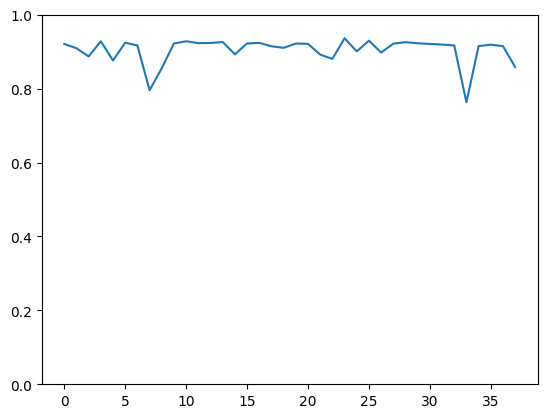

In [7]:
fig =plt.figure()
plt.plot(mesh_quality)
plt.ylim((0,1))
plt.show()

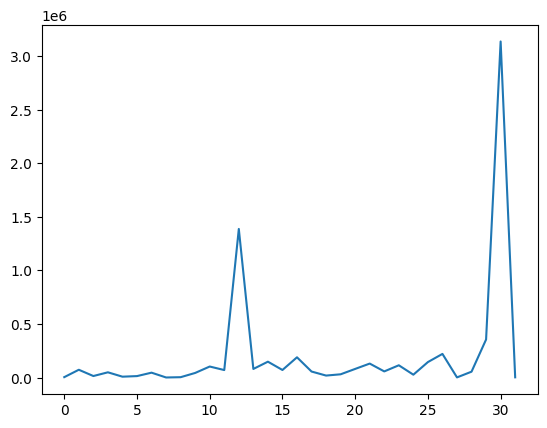

In [31]:
fig =plt.figure()
plt.plot(mesh_size)
plt.show()

In [27]:
np.save(f'{dir}/mesh_quality_optimized.npy',mesh_quality)
np.save(f'{dir}/mesh_size_optimized.npy',mesh_size)
np.save(f'{dir}/tetgen_time_optimized.npy',tetgen_time)


In [32]:

np.save(f'{dir}/mesh_quality_watertight.npy',mesh_quality)
np.save(f'{dir}/mesh_size_watertight.npy',mesh_size)
np.save(f'{dir}/tetgen_time_watertight.npy',tetgen_time)
